In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## MRR mean reciprocal rank evaluation

In [12]:
mrr_df = pd.read_excel(
    "Results summarized.xlsx",
    sheet_name='MRR.T',
    index_col=0)

mrr_df.head()

,VSTAN,History 5,History 10,History 15,History 100
MRR@,,,,,
0,0.192343,0.000151,0.000061,0.000069,0.000530
1,0.213099,0.000153,0.000150,0.000127,0.000102
2,0.184941,0.000055,0.000318,0.000077,0.000124
3,0.173483,0.000332,0.000210,0.000105,0.000092
4,0.174696,0.000114,0.000111,0.000413,0.000573


<Axes: xlabel='MRR@'>

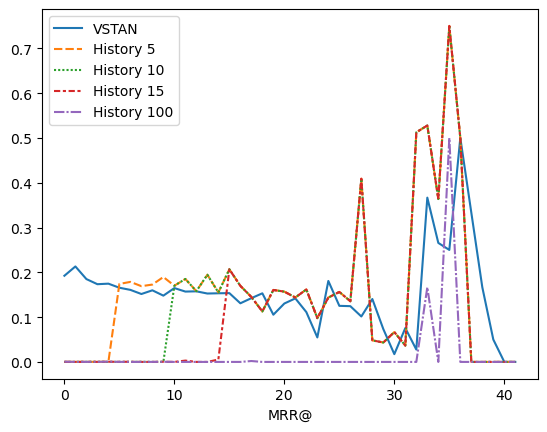

In [13]:
sns.lineplot(data=mrr_df)

## Hit rate evaluation

In [14]:
hit_df = pd.read_excel(
    "Results summarized.xlsx",
    sheet_name='HIT.T',
    index_col=0)

hit_df.head()

,VSTAN,History 5,History 10,History 15,History 100
HIT@,,,,,
0,0.489949,0.000988,0.000635,0.000635,0.001906
1,0.540080,0.001402,0.001402,0.001001,0.000801
2,0.532583,0.000568,0.000994,0.000994,0.001279
3,0.516224,0.000985,0.001182,0.000788,0.000985
4,0.521307,0.001344,0.001613,0.001613,0.002151


<Axes: xlabel='HIT@'>

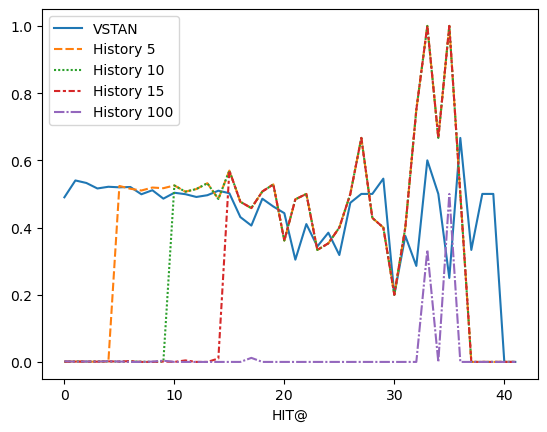

In [15]:
sns.lineplot(data=hit_df)